WATER TREATMENT PLANT DATASET

In [1]:
#IMPORT ALL IMPORTANT LIBRARIES:

%matplotlib inline

from sklearn import datasets, preprocessing, cross_validation, feature_extraction
from sklearn import linear_model, svm, metrics, ensemble, neighbors, cluster
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib2

In [2]:
#LOAD DATASET:

treat_url = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data")

treat = pd.read_csv(treat_url, quotechar='"', skipinitialspace=True, names=['Q-E','ZN-E','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37'])
treat=treat.dropna()
# Convert labels from strings to boolean
label_encoder = preprocessing.LabelEncoder()
treat_labels = pd.DataFrame(label_encoder.fit_transform(treat.iloc[:,1]))
# Convert nominal attributes to encoded versions
attr_encoder = feature_extraction.DictVectorizer(sparse=False)
treat_url = pd.DataFrame(attr_encoder.fit_transform(treat.iloc[:,:38].T.to_dict().values()))
treat_url.columns = attr_encoder.get_feature_names()




                2            8           9           11           14  \
count  527.000000   527.000000  527.000000   527.000000   527.000000   
mean     7.810057  1478.620493    7.829981   253.952562  1496.034156   
std      0.246175   394.898019    0.226925   147.458468   402.588656   
min      6.900000   651.000000    7.300000   104.000000   646.000000   
25%      7.600000  1201.000000    7.700000   184.000000  1217.000000   
50%      7.800000  1406.000000    7.800000   220.000000  1420.000000   
75%      8.000000  1672.000000    8.000000   272.000000  1713.500000   
max      8.700000  3230.000000    8.500000  1692.000000  3170.000000   

               15           21  
count  527.000000   527.000000  
mean     7.811954  1490.569260  
std      0.199594   399.990816  
min      7.100000    85.000000  
25%      7.700000  1225.500000  
50%      7.800000  1428.000000  
75%      7.900000  1701.000000  
max      8.400000  3690.000000  


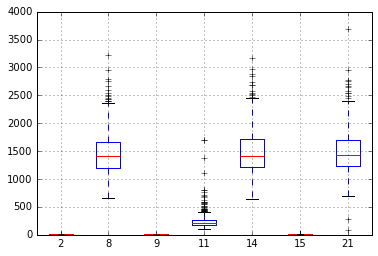

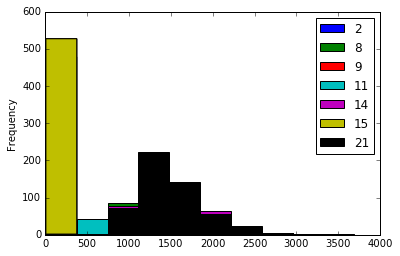

In [3]:
#DESCRIPTIVE STATISTICS AND DATA VISUALIZATION
print treat.describe()
treat.boxplot(return_type='axes')
plt.figure()
treat.plot(kind='hist')

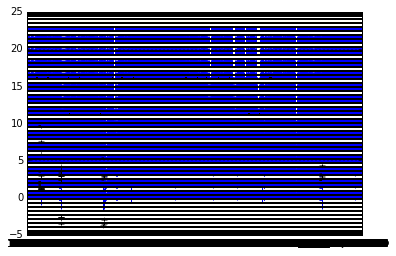

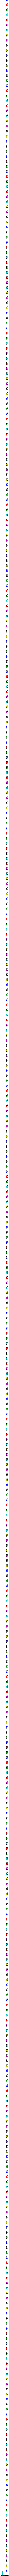

In [4]:
#DATA TRANSFORMATION
scaler= preprocessing.StandardScaler()
treat_scaled_values=scaler.fit_transform(treat_url.values)
treat_values=pd.DataFrame(treat_scaled_values,columns=treat_url.columns)
treat_values.boxplot(return_type='axes')
plt.figure()
treat_values.plot(kind='hist')

IndexError: list index out of range

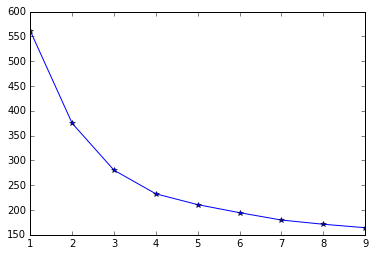

In [6]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

K = range(1,10)

  # scipy.cluster.vq.kmeans
KM = [kmeans(treat_url,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k = [cdist(treat_url, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/treat.shape[0] for d in dist] 
#print avgWithinSS
kIdx = 10
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx])
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clusteringwater')  

In [ ]:
def folds_to_split(data,targets,train,test):
    data_tr = pd.DataFrame(data).iloc[train]
    data_te = pd.DataFrame(data).iloc[test]
    labels_tr = pd.DataFrame(targets).iloc[train]
    labels_te = pd.DataFrame(targets).iloc[test]
    return [data_tr, data_te, labels_tr, labels_te]

In [ ]:
foldnum=0
for train, test in cross_validation.KFold(len(treat_labels), shuffle=True, n_folds=4,
                                           random_state=20160217):
    foldnum+=1
    [treat_tr_data, treat_te_data, 
     treat_tr_targets, treat_te_targets] = folds_to_split(treat_url, treat_labels, train, test)

In [ ]:
#KMEANS:


kmeans1=cluster.KMeans(n_clusters=3, init='random', n_init=10)
treat_means1=kmeans1.fit_transform(treat_te_targets)

kmeans2=cluster.KMeans(n_clusters=3, init='k-means++', n_init=10)
treat_means=kmeans2.fit_transform(treat_te_targets)

mK1=cluster.MiniBatchKMeans(n_clusters=3, init='random', max_iter=100, batch_size=100, tol=0.0, max_no_improvement=10, n_init=3, reassignment_ratio=0.01)
treat_mk=mK1.fit_transform(treat_te_targets)

mK2=cluster.MiniBatchKMeans(n_clusters=8, init='k-means++', max_iter=100, batch_size=100, tol=0.0, max_no_improvement=10, n_init=3, reassignment_ratio=0.01)
treat_mk2=mK2.fit_transform(treat_te_targets)




In [ ]:

kmeans1.fit(treat_tr_data, treat_tr_targets)
kmeans2.fit(treat_tr_data, treat_tr_targets)
mK1.fit(treat_tr_data, treat_tr_targets)
mK2.fit(treat_tr_data, treat_tr_targets)

# Print out the coefficient of determination (R^2)
print "R^2:\t",kmeans1.score(treat_te_data,treat_te_targets)
print "R^2:\t",kmeans2.score(treat_te_data,treat_te_targets)
print "R^2:\t",mK1.score(treat_te_data,treat_te_targets)
print "R^2:\t",mK2.score(treat_te_data,treat_te_targets)

# Peek at the predictions
t_te_predict = kmeans1.predict(treat_te_data)
t_te_predict0 = kmeans2.predict(treat_te_data)
t_te_predict1 = mK1.predict(treat_te_data)
t_te_predict2 = mK2.predict(treat_te_data)
#print w_te_predict
#print w_te_data

# And also the mean squared error:
print "MSE:\t", metrics.mean_squared_error(treat_te_targets, t_te_predict)
print "MSE:\t", metrics.mean_squared_error(treat_te_targets, t_te_predict0)
print "MSE:\t", metrics.mean_squared_error(treat_te_targets, t_te_predict1)
print "MSE:\t", metrics.mean_squared_error(treat_te_targets, t_te_predict2)

# Clustering Peformance Analysis:

In [ ]:
from sklearn import metrics
label_true=test
#print test
label_pred=t_te_predict
label_pred0=t_te_predict0
label_pred1=t_te_predict1
label_pred2=t_te_predict2
#print w_te_predict
metrics.adjusted_rand_score(label_true, label_pred)

In [ ]:
metrics.adjusted_mutual_info_score(label_true, label_pred)

In [ ]:
metrics.homogeneity_score(label_true, label_pred)

In [ ]:
metrics.completeness_score(label_true, label_pred)

In [ ]:
metrics.v_measure_score(label_true, label_pred) 

In [ ]:
metrics.adjusted_rand_score(label_true, label_pred0)

In [ ]:
metrics.adjusted_mutual_info_score(label_true, label_pred0)

In [ ]:
metrics.homogeneity_score(label_true, label_pred0)

In [ ]:
metrics.completeness_score(label_true, label_pred0)

In [ ]:
metrics.v_measure_score(label_true, label_pred0) 

In [ ]:
metrics.adjusted_rand_score(label_true, label_pred1)

In [ ]:
metrics.adjusted_mutual_info_score(label_true, label_pred1)

In [ ]:
metrics.homogeneity_score(label_true, label_pred1)

In [ ]:
metrics.completeness_score(label_true, label_pred1)

In [ ]:
metrics.v_measure_score(label_true, label_pred1)

In [ ]:
metrics.adjusted_rand_score(label_true, label_pred2)

In [ ]:
metrics.adjusted_mutual_info_score(label_true, label_pred2)

In [ ]:
metrics.homogeneity_score(label_true, label_pred2)

In [ ]:
metrics.completeness_score(label_true, label_pred2)

In [ ]:
metrics.v_measure_score(label_true, label_pred2) 